In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# data I/O
data = open('./input_rnn.txt', 'r').read() # should be simple plain text file

# use set() to count the vacab size
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print(f"data size {data_size}  , vocab_size  {vocab_size}")
print(chars)

data size 1115393  , vocab_size  65
['T', 'Q', 'J', 'P', 'G', 'l', 'O', 'W', 'I', '$', 'y', '!', 'U', 'M', 'm', '3', ',', 'S', 'b', 'r', 'L', 'H', 'N', ' ', 'R', 'e', ':', ';', 'f', 'o', 'V', 'p', '.', '&', 'i', 'Y', 'q', 'X', 'c', 'g', 'x', 'z', 'C', 'a', 'B', 'Z', 'd', 'n', 'k', 'E', 'v', 's', 't', 'h', 'A', "'", '-', 'D', 'j', 'F', 'K', 'u', '?', 'w', '\n']


In [8]:
# dictionary to convert char to idx, idx to char
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }
print(char_to_ix)

{'T': 0, 'Q': 1, 'J': 2, 'P': 3, 'G': 4, 'l': 5, 'O': 6, 'W': 7, 'I': 8, '$': 9, 'y': 10, '!': 11, 'U': 12, 'M': 13, 'm': 14, '3': 15, ',': 16, 'S': 17, 'b': 18, 'r': 19, 'L': 20, 'H': 21, 'N': 22, ' ': 23, 'R': 24, 'e': 25, ':': 26, ';': 27, 'f': 28, 'o': 29, 'V': 30, 'p': 31, '.': 32, '&': 33, 'i': 34, 'Y': 35, 'q': 36, 'X': 37, 'c': 38, 'g': 39, 'x': 40, 'z': 41, 'C': 42, 'a': 43, 'B': 44, 'Z': 45, 'd': 46, 'n': 47, 'k': 48, 'E': 49, 'v': 50, 's': 51, 't': 52, 'h': 53, 'A': 54, "'": 55, '-': 56, 'D': 57, 'j': 58, 'F': 59, 'K': 60, 'u': 61, '?': 62, 'w': 63, '\n': 64}


In [9]:
vocab_num=len(char_to_ix)
hidden_state_num=100

k=vocab_num
h=hidden_state_num
print(k,h)



65 100


In [10]:
X_cache={}
y_cache={}
prob_cache={}
h_cache={}

Whh=np.random.randn(h,h)*0.01
Wxh=np.random.randn(h,k)*0.01
Why=np.random.randn(k,h)*0.01
bh=np.random.randn(h,1)*0.01
by=np.random.randn(k,1)*0.01

h_cache[-1]=np.random.randn(h,1)*0.01
# 为了计算loss 所以有第101个值作为第100个输入的label



dWhh=np.zeros((h,h))
dWxh=np.zeros((h,k))
dWhy=np.zeros((k,h))
dbh= np.zeros((h,1))
dby= np.zeros((k,1))
dh_last=np.zeros((h,1))


In [11]:
learning_rate=1e-3
iter_num=1000
loss_lst=[]

for i in range(iter_num):
    loss=0
    input_=data[i*100:(i+1)*100+1]
    n=len(input_)-1
    for t in range(n):
        ##feed forward
        
        # make input into one hot vector
        X_cache[t]=np.zeros((k,1),dtype=np.int0)
        X_cache[t][char_to_ix[input_[t]]]=1

        #update hidden states
        h_cache[t]=np.tanh(Whh@h_cache[t-1]+Wxh@X_cache[t]+bh)
    
        #output
        y_cache[t]=Why@h_cache[t]+by
    
        #softmax
        prob_cache[t]=np.exp(y_cache[t])/np.sum(np.exp(y_cache[t]))
    
        # compute loss
        loss+=-np.log(prob_cache[t][char_to_ix[input_[t+1]]])
    

    for t in reversed(range(n)):
        ## backpropagation
        dout2=prob_cache[t].copy()
        dout2[char_to_ix[input_[t+1]]]-=1

     
        dby+=dout2

        dWhy+=dout2@h_cache[t].T

        dout1_tanh=Why.T@dout2+dh_last
        dout1=dout1_tanh*(1-h_cache[t]**2)

        dbh+=dout1

        dWxh+=dout1@X_cache[t].T

        dWhh+=dout1@h_cache[t-1].T

        dh_last=Whh.T@dout1

    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients

    loss_lst.append(loss)
    print('-----------------------')
    print(f"iter {i+1}")
    print(f"loss {loss}")
    ##update param
    Whh-=learning_rate*dWhh
    Why-=learning_rate*dWhy
    Wxh-=learning_rate*dWxh
    bh-=learning_rate*dbh
    by-=learning_rate*dby

-----------------------
iter 1
loss [417.31468228]
-----------------------
iter 2
loss [417.01363576]
-----------------------
iter 3
loss [416.74720387]
-----------------------
iter 4
loss [416.19553216]
-----------------------
iter 5
loss [415.62873917]
-----------------------
iter 6
loss [415.04642881]
-----------------------
iter 7
loss [414.55769946]
-----------------------
iter 8
loss [413.52849035]
-----------------------
iter 9
loss [412.88889874]
-----------------------
iter 10
loss [412.48971406]
-----------------------
iter 11
loss [412.14541012]
-----------------------
iter 12
loss [410.96598427]
-----------------------
iter 13
loss [410.21728363]
-----------------------
iter 14
loss [410.0861886]
-----------------------
iter 15
loss [407.67880638]
-----------------------
iter 16
loss [406.13014888]
-----------------------
iter 17
loss [405.15229662]
-----------------------
iter 18
loss [404.40192089]
-----------------------
iter 19
loss [401.80434828]
----------------------

KeyboardInterrupt: 

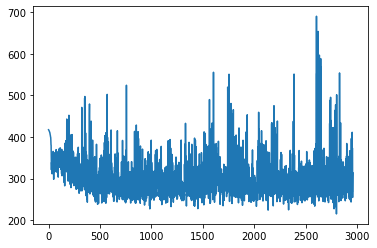

In [12]:
plt.plot(loss_lst)
plt.show()